<a href="https://colab.research.google.com/github/juanosalvador/Arrhythmia-Dataset/blob/master/Neural_Network_Arrhythmia_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
path_x = 'https://raw.githubusercontent.com/juanosalvador/Arrhythmia-Dataset/master/arrhythmia.data'
path_y = 'https://raw.githubusercontent.com/juanosalvador/Arrhythmia-Dataset/master/Y.csv'
features = pd.read_csv(path_x, header = None)
label = pd.read_csv(path_y, header=None)
## 
features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0.0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,?,?,0,48,40,0,0,28,0,0,0,0,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,...,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0.0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [52]:
features.describe().T

,count,mean,std,min,25%,50%,75%,max
0,452.0,46.471239,16.466631,0.0,36.00,47.00,58.000,83.0
1,452.0,0.550885,0.497955,0.0,0.00,1.00,1.000,1.0
2,452.0,166.188053,37.170340,105.0,160.00,164.00,170.000,780.0
3,452.0,68.170354,16.590803,6.0,59.00,68.00,79.000,176.0
4,452.0,88.920354,15.364394,55.0,80.00,86.00,94.000,188.0
...,...,...,...,...,...,...,...,...
275,452.0,0.514823,0.347531,-0.8,0.40,0.50,0.700,2.4
276,452.0,1.222345,1.426052,-6.0,0.50,1.35,2.100,6.0
277,452.0,19.326106,13.503922,-44.2,11.45,18.10,25.825,88.8
278,452.0,29.473230,18.493927,-38.6,17.55,27.90,41.125,115.9


In [53]:
def Faltantes(features):
  ## los valores nulos están representados con un signo de interrogacion
  features = features.replace('?', np.nan)
  col_null = pd.DataFrame(data = features.isnull().sum()).reset_index().rename(columns = {'index':'atributo', 0:'Faltantes'})
  for i in range(len(col_null)):
    if col_null.iloc[i]['Faltantes'] > 0:
      print('Columna', col_null.iloc[i]['atributo'], 'presenta un', round(col_null.iloc[i]['Faltantes']/452,3)*100 , '% de valores faltantes' )

features = features.replace('?', np.nan)

In [54]:
Faltantes(features)

Columna 10 presenta un 1.7999999999999998 % de valores faltantes
Columna 11 presenta un 4.9 % de valores faltantes
Columna 12 presenta un 0.2 % de valores faltantes
Columna 13 presenta un 83.2 % de valores faltantes
Columna 14 presenta un 0.2 % de valores faltantes


In [55]:
# La columna trece presenta un 83% de valores faltantes
features.drop([13], axis= 1, inplace = True)

In [56]:
Faltantes(features)

Columna 10 presenta un 1.7999999999999998 % de valores faltantes
Columna 11 presenta un 4.9 % de valores faltantes
Columna 12 presenta un 0.2 % de valores faltantes
Columna 14 presenta un 0.2 % de valores faltantes


In [57]:
# Imputando por la mediana
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy = 'median')
features = pd.DataFrame(data = imp.fit_transform(features))

data = features[0]

from sklearn.neighbors import KernelDensity
kde = KernelDensity(kernel='gaussian',bandwidth = 1)
kde.fit(data[:, None])

x = np.arange(0, 83, 2) # Definimos un rango de valores para calcular su probabilidad
prob = np.exp(kde.score_samples (x[:, None]))

plt.clf()
plt.hist(data, bins = 34, density=True)
plt.plot(x, prob, "r")
plt.show()

In [58]:
# Estandarizamos los datos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features = sc.fit_transform(features)
#features

In [59]:
print('Cantidad de clases en la variable dependiente :' ,len(label[0].unique()))

Cantidad de clases en la variable dependiente : 13


In [60]:
print('Dimensiones de las variables de entrada o "x": ' ,features.shape)
print('***********************************************************')
print('Dimensión de la variable de salida "y" o label: ' ,label.shape)

Dimensiones de las variables de entrada o "x":  (452, 279)
***********************************************************
Dimensión de la variable de salida "y" o label:  (452, 1)


In [61]:
cant_clases = pd.DataFrame(data = label[0]).rename(columns = {0:'y'})
#cant_clases

In [62]:
def resume(data,col):
  tabla = data.groupby(col).size().reset_index().rename(columns={0:'Frec. Abs'}).sort_values(by=['Frec. Abs'], ascending = False).reset_index(drop=True)
  return tabla


In [63]:
resume(cant_clases, 'y')

,y,Frec. Abs
0,1.0,245
1,10.0,50
2,2.0,44
3,6.0,25
4,16.0,22
5,3.0,15
6,4.0,15
7,5.0,13
8,9.0,9
9,15.0,5


### Se puede observar que las clases de la variable "y" están desbalanceadas

# a) Generar el vector binario que codifica las clases para ser entregado a las redes.




In [64]:
print('Vector de clases de la variable y: ', np.sort(label[0].unique()))
print('*****************************************************************')
print('Cantidad de valores únicos en la variable y: ', len(np.unique(label[0])))

Vector de clases de la variable y:  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 14. 15. 16.]
*****************************************************************
Cantidad de valores únicos en la variable y:  13


#<center><h1>Codificando la clase de salida </h1></center>

In [65]:
from keras.utils import to_categorical
num_classes = 17#len(np.unique(label[0]))
vector_clases = to_categorical(label[0], num_classes)
#vc = to_categorical(clases[0], num_classes)
print('Dimensiones vector clases: ', vector_clases.shape)
print('***************************************************')
for i in range(0,17):

  print(vector_clases[i], 'Es la clase: ', label[0][i])

Dimensiones vector clases:  (452, 17)
***************************************************
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Es la clase:  8.0
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Es la clase:  6.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] Es la clase:  10.0
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Es la clase:  1.0
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Es la clase:  7.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] Es la clase:  14.0
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Es la clase:  1.0
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Es la clase:  1.0
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Es la clase:  1.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] Es la clase:  10.0
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Es la clase:  3.0
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Es la clase:  1.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] Es

# b) Para cada red calcular especificidad, sensibilidad y precisión para cada clase, y el promedio total entre todas las clases.

Utilizaremos los 400 primero datos para entrenar

#<center><h1>Red Neuronal 0</h1></center>

In [66]:
## Generando una lista con la cantidad de capas con sus respectivas neuronas
nn = [279,100 ,17]
## Fijamos un batchsize de 10
batchsize = 40

In [67]:
## Conjunto de entrenamiento
x_train = features[:400]
y_train = vector_clases[:400]

# Conjunto de test
x_test = features[400:]
y_test = vector_clases[400:]

In [68]:
## Barajamos las clases

In [69]:
import tensorflow.keras as kr
from tensorflow.keras import optimizers
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
from keras.utils import plot_model

## Creamos la estructura que contendrá nuestro modelo
model0 = kr.Sequential()
## Añadiremos algunas capas a nuestra red neuronal
## Capa 1 con 500 neuronas y 279 datos de entrada
model0.add(kr.layers.Dense(nn[1], input_shape = (279,),activation='relu', name="layer1_red0"))
## Capa 2 con 250 neuronas
#model.add(kr.layers.Dense(nn[2], activation='relu'))

## Capa de salida con 17 neuronas
model0.add(kr.layers.Dense(nn[-1], activation='softmax', name = 'layerOut_red0'))

## optimizador descenso del gradiente estocastico
opt = SGD(lr=0.02)
## Compilamos el modelo
model0.compile(loss = 'categorical_crossentropy', optimizer= opt, metrics = ['acc'])

In [70]:
## Configuramos la regularización por earlystopoing
earlystopping = EarlyStopping(monitor='val_loss', 
                              min_delta=0,
                              patience = 15,
                              mode='min',
                              restore_best_weights=True)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1_red0 (Dense)          (None, 100)               28000     
_________________________________________________________________
layerOut_red0 (Dense)        (None, 17)                1717      
Total params: 29,717
Trainable params: 29,717
Non-trainable params: 0
_________________________________________________________________


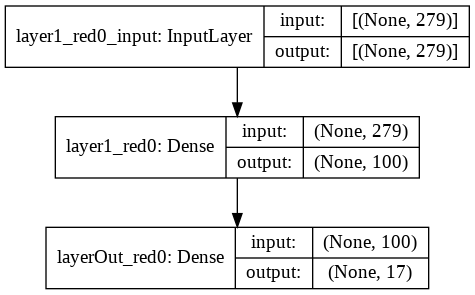

In [71]:
model0.summary()
plot_model(model0, 'net0.png', show_shapes=True)

In [72]:
## Entrenamos el modelo
%time
history0 = model0.fit(x_train, 
          y_train,
          epochs = 400,
          batch_size=batchsize,
          validation_split=0.2,
          verbose = True,
          callbacks=earlystopping)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 9.78 µs
Epoch 1/400
8/8 [==============================] - 0s 24ms/step - loss: 3.1233 - acc: 0.0801 - val_loss: 2.8513 - val_acc: 0.2375
Epoch 2/400
8/8 [==============================] - 0s 5ms/step - loss: 2.2945 - acc: 0.4316 - val_loss: 2.4656 - val_acc: 0.3625
Epoch 3/400
8/8 [==============================] - 0s 6ms/step - loss: 1.8606 - acc: 0.5848 - val_loss: 2.2448 - val_acc: 0.4500
Epoch 4/400
8/8 [==============================] - 0s 6ms/step - loss: 1.5858 - acc: 0.6073 - val_loss: 2.1011 - val_acc: 0.4625
Epoch 5/400
8/8 [==============================] - 0s 6ms/step - loss: 1.4382 - acc: 0.6286 - val_loss: 1.9999 - val_acc: 0.4625
Epoch 6/400
8/8 [==============================] - 0s 6ms/step - loss: 1.3120 - acc: 0.6559 - val_loss: 1.9241 - val_acc: 0.4625
Epoch 7/400
8/8 [==============================] - 0s 6ms/step - loss: 1.1059 - acc: 0.7036 - val_loss: 1.8636 - val_acc: 0.4875
Epoch 8/400
8/8 [===============

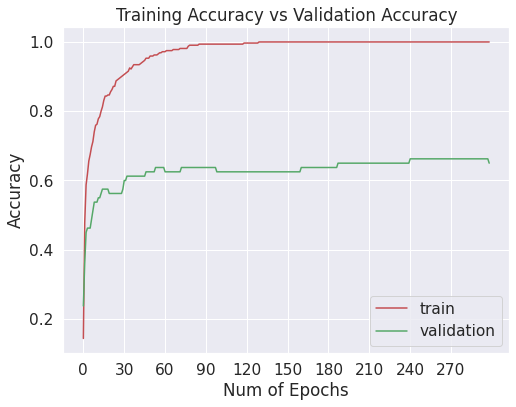

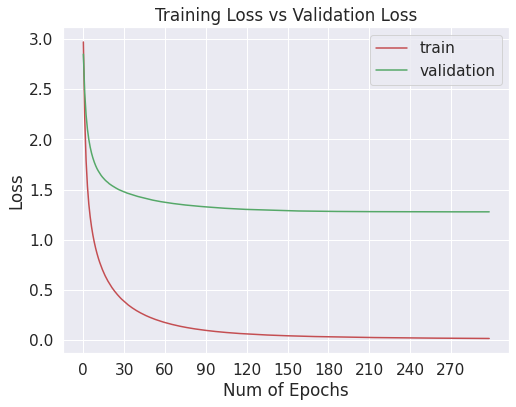

In [74]:
plt.figure(0)  
plt.plot(history0.history['acc'],'r')  
plt.plot(history0.history['val_acc'],'g')  
plt.xticks(np.arange(0, 300, 30))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1)  
plt.plot(history0.history['loss'],'r')  
plt.plot(history0.history['val_loss'],'g')  
plt.xticks(np.arange(0, 300, 30))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

plt.show()

In [75]:
#Predicciones
red0_pred = model0.predict(x_test, batch_size=batchsize, verbose=1)  
red0_predicted = np.argmax(red0_pred, axis=1)

2/2 [==============================] - 0s 5ms/step


In [82]:
## Evaluando el modelo
train_loss, train_acc = model0.evaluate(x_train, y_train)
print('Train_loss: ', train_loss, 'Train_Acc: ', train_acc)
test_loss, test_acc = model0.evaluate(x_test, y_test)
print('Test_loss: ', test_loss, 'Test_Acc: ', test_acc)

13/13 [==============================] - 0s 2ms/step - loss: 0.2679 - acc: 0.9325
Train_loss:  0.2679024934768677 Train_Acc:  0.9325000047683716
2/2 [==============================] - 0s 3ms/step - loss: 1.2960 - acc: 0.7115
Test_loss:  1.2959753274917603 Test_Acc:  0.7115384340286255


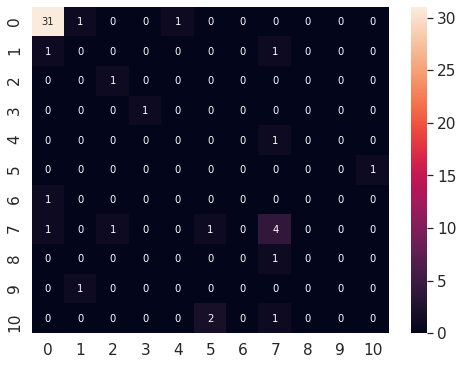

In [83]:
import seaborn as sn 
from sklearn.metrics import confusion_matrix, classification_report 
#Creamos la matriz de confusión
red0_cm = confusion_matrix(np.argmax(y_test, axis=1), red0_predicted)

# Visualizamos la matriz de confusión
cm_red0= pd.DataFrame(red0_cm, range(11), range(11))  
plt.figure(figsize = (8,6))  
sn.set(font_scale=1.4) #for label size  
sn.heatmap(cm_red0, annot=True, annot_kws={"size": 10}) # font size  
plt.show()  

In [84]:
red0_report = classification_report(np.argmax(y_test, axis=1), red0_predicted)  
print(red0_report)

              precision    recall  f1-score   support

           1       0.91      0.94      0.93        33
           2       0.00      0.00      0.00         2
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.50      0.57      0.53         7
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         3

    accuracy                           0.71        52
   macro avg       0.26      0.32      0.28        52
weighted avg       0.67      0.71      0.69        52



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#<center><h1>Red Neuronal 1</h1></center>

In [86]:
## Definiendo la cantidad de neuronas en cada capa
nn = [279,1000,500,250,17]
batchsize = 40
## Conjunto de entrenamiento
x_train = features[:400]
y_train = vector_clases[:400]

# Conjunto de test
x_test = features[400:]
y_test = vector_clases[400:]

In [87]:
import tensorflow.keras as kr
from tensorflow.keras import optimizers
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD

## Creamos la estructura que contendrá nuestro modelo
model1 = kr.Sequential()
## Añadiremos algunas capas a nuestra red neuronal
## Capa 1
model1.add(kr.layers.Dense(nn[1], input_shape = (279,),activation='relu', name = 'layer1_red1'))
## Agregamos una capa de dropout
model1.add(Dropout(rate = 0.5))
## Capa 2
model1.add(kr.layers.Dense(nn[2], activation='relu', name = 'layer2_red1'))
## Capa 3
model1.add(kr.layers.Dense(nn[3], activation='relu', name = 'layer3_red1'))
## Agregamos una capa de dropout
model1.add(Dropout(rate = 0.5))
## Capa de salida
model1.add(kr.layers.Dense(nn[-1], activation='softmax', name = 'layerOut_red1'))

## optimizador descenso del gradiente estocastico
opt = SGD(lr=0.01)
## Compilamos el modelo
model1.compile(loss = 'categorical_crossentropy', optimizer= opt, metrics = ['acc'])

In [88]:
earlystopping = EarlyStopping(monitor='val_loss', 
                              min_delta=0,
                              patience = 15,
                              mode='min',
                              restore_best_weights=True)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1_red1 (Dense)          (None, 1000)              280000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
layer2_red1 (Dense)          (None, 500)               500500    
_________________________________________________________________
layer3_red1 (Dense)          (None, 250)               125250    
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
layerOut_red1 (Dense)        (None, 17)                4267      
Total params: 910,017
Trainable params: 910,017
Non-trainable params: 0
________________________________________________

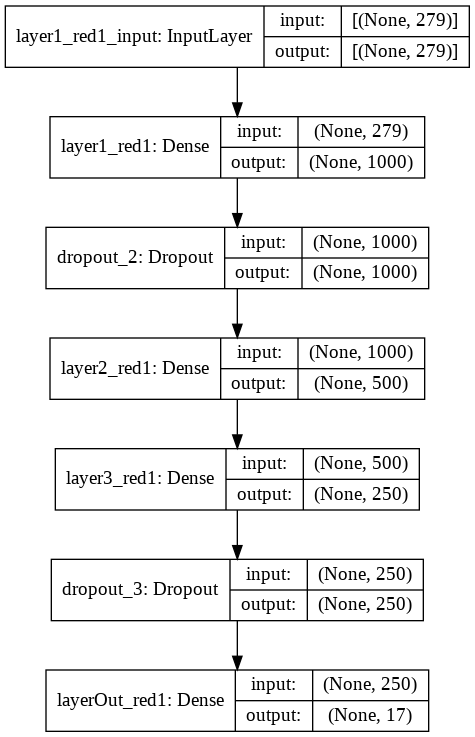

In [89]:
model1.summary()
plot_model(model1, 'net1.png', show_shapes=True)

In [90]:
## Entrenamos el modelo
%time
history1 = model1.fit(x_train, 
          y_train,
          epochs = 400,
          batch_size=batchsize,
          validation_split=0.2,
          verbose = True,
          callbacks=earlystopping)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10 µs
Epoch 1/400
8/8 [==============================] - 1s 59ms/step - loss: 3.0765 - acc: 0.0682 - val_loss: 2.4147 - val_acc: 0.4250
Epoch 2/400
8/8 [==============================] - 0s 16ms/step - loss: 2.5242 - acc: 0.3334 - val_loss: 2.2421 - val_acc: 0.4250
Epoch 3/400
8/8 [==============================] - 0s 17ms/step - loss: 2.2006 - acc: 0.4896 - val_loss: 2.1469 - val_acc: 0.4250
Epoch 4/400
8/8 [==============================] - 0s 15ms/step - loss: 2.1681 - acc: 0.5097 - val_loss: 2.0512 - val_acc: 0.4250
Epoch 5/400
8/8 [==============================] - 0s 16ms/step - loss: 2.0305 - acc: 0.5338 - val_loss: 1.9776 - val_acc: 0.4250
Epoch 6/400
8/8 [==============================] - 0s 15ms/step - loss: 1.8064 - acc: 0.5786 - val_loss: 1.8955 - val_acc: 0.4250
Epoch 7/400
8/8 [==============================] - 0s 16ms/step - loss: 1.8643 - acc: 0.5606 - val_loss: 1.8333 - val_acc: 0.4375
Epoch 8/400
8/8 [===========

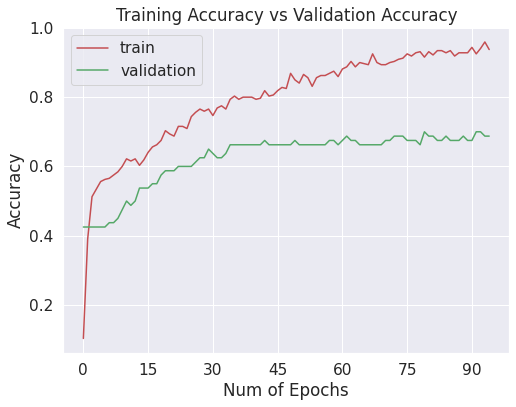

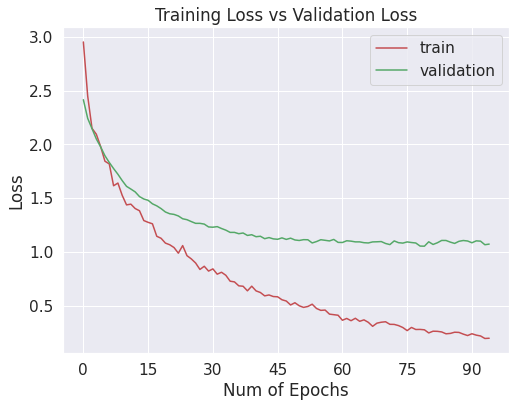

In [91]:
plt.figure(0)  
plt.plot(history1.history['acc'],'r')  
plt.plot(history1.history['val_acc'],'g')  
plt.xticks(np.arange(0, 100, 15))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1)  
plt.plot(history1.history['loss'],'r')  
plt.plot(history1.history['val_loss'],'g')  
plt.xticks(np.arange(0, 100, 15))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

plt.show()

In [93]:
## Evaluando el modelo
train_loss, train_acc = model1.evaluate(x_train, y_train)
print('Train_loss: ', train_loss, 'Train_Acc: ', train_acc)
test_loss, test_acc = model1.evaluate(x_test, y_test)
print('Test_loss: ', test_loss, 'Test_Acc: ', test_acc)

13/13 [==============================] - 0s 3ms/step - loss: 0.3129 - acc: 0.9300
Train_loss:  0.31285953521728516 Train_Acc:  0.9300000071525574
2/2 [==============================] - 0s 6ms/step - loss: 0.8470 - acc: 0.7885
Test_loss:  0.8469952940940857 Test_Acc:  0.7884615659713745


In [94]:
test_acc

0.7884615659713745

In [95]:
train_acc

0.9300000071525574

In [96]:
#Predicciones
red1_pred = model1.predict(x_test, batch_size=batchsize, verbose=1)  
red1_predicted = np.argmax(red1_pred, axis=-1)

2/2 [==============================] - 0s 6ms/step


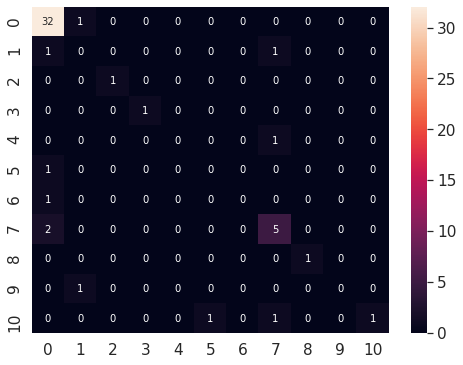

In [99]:
import seaborn as sn 
from sklearn.metrics import confusion_matrix, classification_report 
#Creamos la matriz de confusión
red1_cm = confusion_matrix(np.argmax(y_test, axis=-1), red1_predicted)

# Visualizamos la matriz de confusión
cm_red1= pd.DataFrame(red1_cm, range(11), range(11))  
plt.figure(figsize = (8,6))  
sn.set(font_scale=1.4) #for label size  
sn.heatmap(cm_red1, annot=True, annot_kws={"size": 10}) # font size  
plt.show()  

In [100]:
red1_report = classification_report(np.argmax(y_test, axis=-1), red1_predicted)  
print(red1_report)

              precision    recall  f1-score   support

           1       0.86      0.97      0.91        33
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.62      0.71      0.67         7
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         1
          16       1.00      0.33      0.50         3

    accuracy                           0.79        52
   macro avg       0.50      0.46      0.46        52
weighted avg       0.75      0.79      0.76        52



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# <center><h1>Red Neuronal 2 </h1></center>

In [101]:
## Definiendo la cantidad de neuronas en cada capa
nn = [279,250,150,100,50,25,17]
batchsize = 40
## Conjunto de entrenamiento
x_train = features[:400]
y_train = vector_clases[:400]

# Conjunto de test
x_test = features[400:]
y_test = vector_clases[400:]

In [103]:
import tensorflow.keras as kr
from tensorflow.keras import optimizers
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD

## Creamos la estructura que contendrá nuestro modelo
model2 = kr.Sequential()
## Añadiremos algunas capas a nuestra red neuronal
## Capa 1
model2.add(kr.layers.Dense(nn[1], input_shape = (279,),activation='relu', name = 'layer1_red2'))
## Agregamos una capa de dropout
model2.add(Dropout(rate = 0.5))
## Capa 2
model2.add(kr.layers.Dense(nn[2], activation = 'relu', name = 'layer2_red2'))
## Capa 3
model2.add(kr.layers.Dense(nn[3], activation = 'relu', name = 'layer3_red2'))
## Agregamos una capa de dropout
model2.add(Dropout(rate = 0.5))
## Capa 4
model2.add(kr.layers.Dense(nn[4], activation = 'sigmoid', name = 'layer4_red2'))
## Capa 5
model2.add(kr.layers.Dense(nn[5], activation = 'relu', name = 'layer5_red2'))


## Capa de salida
model2.add(kr.layers.Dense(nn[-1], activation='softmax', name = 'layerOut_red2'))

## optimizador descenso del gradiente estocastico
opt = SGD(lr=0.01)
## Compilamos el modelo
model2.compile(loss = 'categorical_crossentropy', optimizer= opt, metrics = ['acc'])

In [104]:
earlystopping = EarlyStopping(monitor='val_loss', 
                              min_delta=0,
                              patience = 15,
                              mode='min',
                              restore_best_weights=True)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1_red2 (Dense)          (None, 250)               70000     
_________________________________________________________________
dropout_4 (Dropout)          (None, 250)               0         
_________________________________________________________________
layer2_red2 (Dense)          (None, 150)               37650     
_________________________________________________________________
layer3_red2 (Dense)          (None, 100)               15100     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
layer4_red2 (Dense)          (None, 50)                5050      
_________________________________________________________________
layer5_red2 (Dense)          (None, 25)               

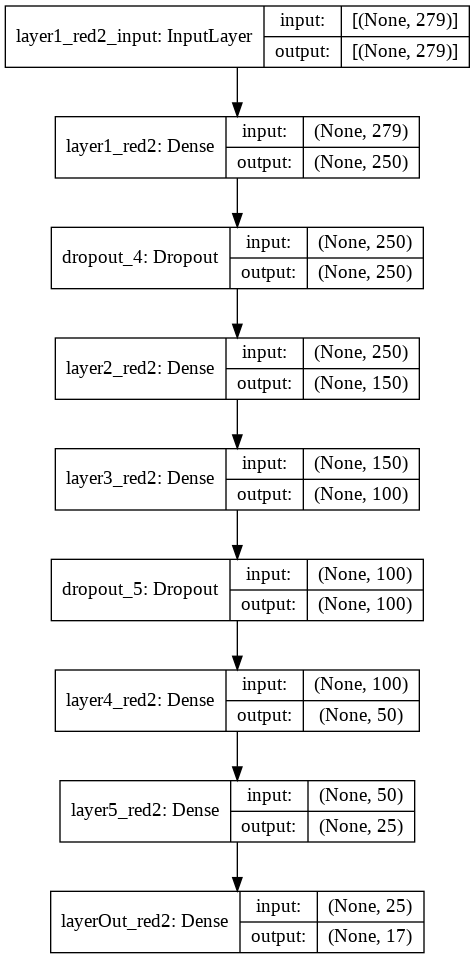

In [105]:
model2.summary()
plot_model(model2, 'net2.png', show_shapes=True)

In [106]:
## Entrenamos el modelo
%time
history2 = model2.fit(x_train, 
          y_train,
          epochs = 400,
          batch_size=batchsize,
          validation_split=0.2,
          verbose = True,
          callbacks=earlystopping)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.54 µs
Epoch 1/400
8/8 [==============================] - 1s 30ms/step - loss: 2.8426 - acc: 0.0080 - val_loss: 2.5770 - val_acc: 0.1625
Epoch 2/400
8/8 [==============================] - 0s 8ms/step - loss: 2.5497 - acc: 0.3018 - val_loss: 2.4106 - val_acc: 0.4250
Epoch 3/400
8/8 [==============================] - 0s 7ms/step - loss: 2.3428 - acc: 0.5316 - val_loss: 2.2874 - val_acc: 0.4250
Epoch 4/400
8/8 [==============================] - 0s 7ms/step - loss: 2.0643 - acc: 0.5817 - val_loss: 2.2015 - val_acc: 0.4250
Epoch 5/400
8/8 [==============================] - 0s 7ms/step - loss: 1.9739 - acc: 0.5604 - val_loss: 2.1560 - val_acc: 0.4250
Epoch 6/400
8/8 [==============================] - 0s 7ms/step - loss: 1.9052 - acc: 0.5678 - val_loss: 2.1387 - val_acc: 0.4250
Epoch 7/400
8/8 [==============================] - 0s 7ms/step - loss: 1.8412 - acc: 0.5636 - val_loss: 2.1302 - val_acc: 0.4250
Epoch 8/400
8/8 [===============

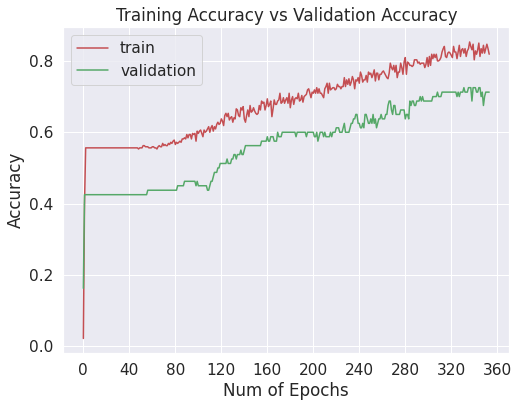

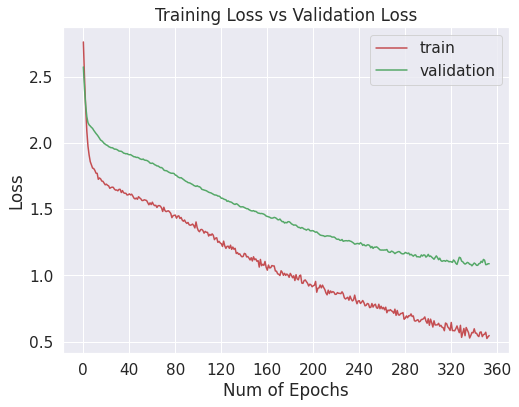

In [107]:
plt.figure(0)  
plt.plot(history2.history['acc'],'r')  
plt.plot(history2.history['val_acc'],'g')  
plt.xticks(np.arange(0, 400, 40))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1)  
plt.plot(history2.history['loss'],'r')  
plt.plot(history2.history['val_loss'],'g')  
plt.xticks(np.arange(0,400, 40))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

plt.show()

In [109]:
## Evaluando el modelo
train_loss, train_acc = model2.evaluate(x_train, y_train)
#print('Train_loss: ', train_loss, 'Train_Acc: ', train_acc)
test_loss, test_acc = model2.evaluate(x_test, y_test)
#print('Test_loss: ', test_loss, 'Test_Acc: ', test_acc)

2/2 [==============================] - 0s 6ms/step - loss: 0.8127 - acc: 0.7500


In [110]:
#Predicciones
red2_pred = model2.predict(x_test, batch_size=batchsize, verbose=1)  
red2_predicted = np.argmax(red2_pred, axis=-1)

2/2 [==============================] - 0s 6ms/step


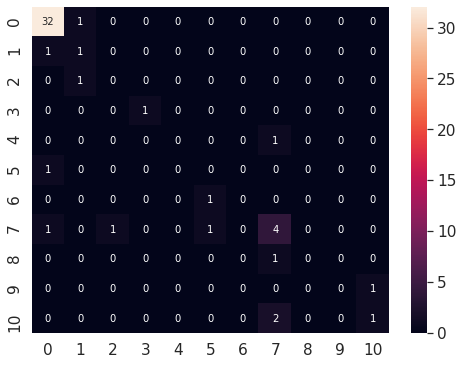

In [111]:
import seaborn as sn 
from sklearn.metrics import confusion_matrix, classification_report 
#Creamos la matriz de confusión
red2_cm = confusion_matrix(np.argmax(y_test, axis=-1), red2_predicted)

# Visualizamos la matriz de confusión
cm_red2= pd.DataFrame(red2_cm, range(11), range(11))  
plt.figure(figsize = (8,6))  
sn.set(font_scale=1.4) #for label size  
sn.heatmap(cm_red2, annot=True, annot_kws={"size": 10}) # font size  
plt.show()

In [112]:
red2_report = classification_report(np.argmax(y_test, axis=1), red2_predicted)  
print(red0_report)
print(red1_report)
print(red2_report)

              precision    recall  f1-score   support

           1       0.91      0.94      0.93        33
           2       0.00      0.00      0.00         2
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.50      0.57      0.53         7
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         3

    accuracy                           0.71        52
   macro avg       0.26      0.32      0.28        52
weighted avg       0.67      0.71      0.69        52

              precision    recall  f1-score   support

           1       0.86      0.97      0.91        33
           2       0.00      0.00      0.00         2
           3       1.00 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred

In [ ]:
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
_, train_acc = model.evaluate(x_train, y_train)

In [ ]:
print(test_acc, train_acc)

In [ ]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy

FILENAME = '../data/pima-indians-diabetes.csv'

# Fix random seed for reproducibility.
seed = 7
numpy.random.seed(seed)

# Load Pima indians dataset.
dataset = numpy.loadtxt(FILENAME, delimiter=',')
# Split into input (X) and output (Y) variables.
training_data = dataset[:, 0:8]
training_targets = dataset[:, 8]

#  Create model:
#   'relu' Activation function for input layer.
#   We use a 'sigmoid' activation function on the output layer to ensure our network output
#   is between 0 and 1 and easy to map to either a probability of class 1 or snap to a hard classification.
#   of either class with a default threshold of 0.5.
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(training_data, training_targets, epochs=150, batch_size=10)
scores = model.evaluate(training_data, training_targets)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

# Creando red neuronal basica


In [ ]:
from scipy import stats

class capa():
  def __init__(self, n_neuronas_capa_anterior, n_neuronas, funcion_act):
    self.funcion_act = funcion_act
    self.b  = np.round(stats.truncnorm.rvs(-1, 1, loc=0, scale=1, size= n_neuronas).reshape(1,n_neuronas),3)
    self.W  = np.round(stats.truncnorm.rvs(-1, 1, loc=0, scale=1, size= n_neuronas * n_neuronas_capa_anterior).reshape(n_neuronas_capa_anterior,n_neuronas),3)

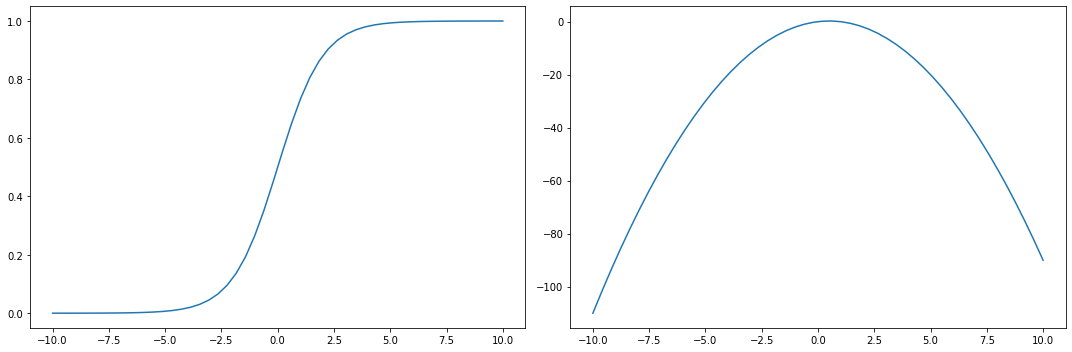

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt


sigmoid = (
  lambda x:1 / (1 + np.exp(-x)),
  lambda x:x * (1 - x)
  )

rango = np.linspace(-10,10).reshape([50,1])
datos_sigmoide = sigmoid[0](rango)
datos_sigmoide_derivada = sigmoid[1](rango)

#Cremos los graficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(15,5))
axes[0].plot(rango, datos_sigmoide)
axes[1].plot(rango, datos_sigmoide_derivada)
fig.tight_layout()

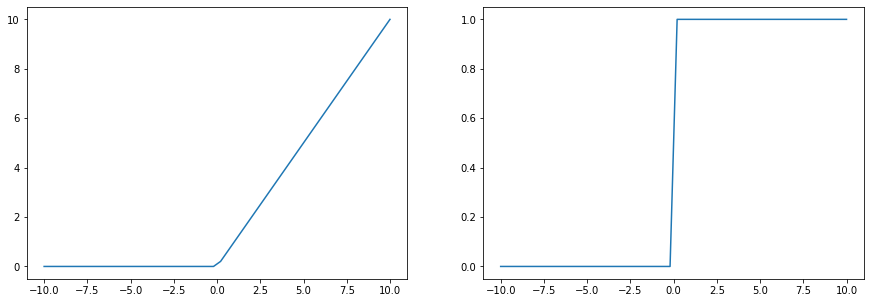

In [ ]:
def derivada_relu(x):
  x[x<=0] = 0
  x[x>0] = 1
  return x

relu = (
  lambda x: x * (x > 0),
  lambda x:derivada_relu(x)
  )

datos_relu = relu[0](rango)
datos_relu_derivada = relu[1](rango)


# Volvemos a definir rango que ha sido cambiado
rango = np.linspace(-10,10).reshape([50,1])

# Cremos los graficos
#plt.cla()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(15,5))
axes[0].plot(rango, datos_relu[:,0])
axes[1].plot(rango, datos_relu_derivada[:,0])
plt.show()

In [ ]:
# Numero de neuronas en cada capa. 
# El primer valor es el numero de columnas de la capa de entrada.
neuronas = [2,4,8,1] 

In [ ]:
neuronas

[2, 4, 8, 1]

In [ ]:
# Funciones de activacion usadas en cada capa. 
funciones_activacion = [relu,relu, sigmoid]

In [ ]:
red_neuronal = []

for paso in range(len(neuronas)-1):
  x = capa(neuronas[paso],neuronas[paso+1],funciones_activacion[paso])
  red_neuronal.append(x)

print(red_neuronal)

[<__main__.capa object at 0x7f7f7d654d30>, <__main__.capa object at 0x7f7f7d654780>, <__main__.capa object at 0x7f7f7d644198>]


In [ ]:
neuronas

[2, 4, 8, 1]

In [ ]:
X =  np.round(np.random.randn(20,2),3) # Ejemplo de vector de entrada

z = X @ red_neuronal[0].W

print(z[:10,:], X.shape, z.shape)

[[-1.327674 -0.38108  -0.137426 -1.28877 ]
 [-1.178937  0.023774  0.017723 -0.783456]
 [-0.821349  0.699634  0.275935  0.134934]
 [-0.031304  0.861324  0.3326    0.836974]
 [ 1.384587  0.412078  0.148975  1.358628]
 [-0.684272 -0.369316 -0.137552 -0.836546]
 [-0.80786   0.382356  0.153404 -0.172034]
 [-0.09753   0.645524  0.249806  0.576564]
 [ 0.528548 -0.508884 -0.200204 -0.145294]
 [ 0.843667 -0.271674 -0.110953  0.306856]] (20, 2) (20, 4)


In [ ]:
# Ahora, hay que sumar el parámetro bias (b) al resultado anterior de z
z = z + red_neuronal[0].b

print(z[:5,:])

[[-2.037674 -0.85808   0.203574 -1.56977 ]
 [-1.888937 -0.453226  0.358723 -1.064456]
 [-1.531349  0.222634  0.616935 -0.146066]
 [-0.741304  0.384324  0.6736    0.555974]
 [ 0.674587 -0.064922  0.489975  1.077628]]


In [ ]:
# Ahora, habría que aplicar la función de activación de esa capa

a = red_neuronal[0].funcion_act[0](z)
a[:5,:]

array([[-0.      , -0.      ,  0.203574, -0.      ],
       [-0.      , -0.      ,  0.358723, -0.      ],
       [-0.      ,  0.222634,  0.616935, -0.      ],
       [-0.      ,  0.384324,  0.6736  ,  0.555974],
       [ 0.674587, -0.      ,  0.489975,  1.077628]])

In [ ]:
output = [X]

for num_capa in range(len(red_neuronal)):
  z = output[-1] @ red_neuronal[num_capa].W + red_neuronal[num_capa].b
  a = red_neuronal[num_capa].funcion_act[0](z)
  output.append(a)

print(output[-1])


[[0.65369944]
 [0.69243446]
 [0.77301516]
 [0.76368266]
 [0.68782435]
 [0.65366218]
 [0.7194693 ]
 [0.73868313]
 [0.63491084]
 [0.68304176]
 [0.70562324]
 [0.66365427]
 [0.65979406]
 [0.72529244]
 [0.70827457]
 [0.69345612]
 [0.69070574]
 [0.69091911]
 [0.66495453]
 [0.68471   ]]


In [ ]:
def mse(Ypredich, Yreal):

  # Calculamos el error
  x = (np.array(Ypredich) - np.array(Yreal)) ** 2
  x = np.mean(x)

  # Calculamos la derivada de la funcion
  y = np.array(Ypredich) - np.array(Yreal)
  return (x,y)

In [ ]:
from random import shuffle

Y = [0] * 10 + [1] * 10
shuffle(Y)
Y = np.array(Y).reshape(len(Y),1)

mse(output[-1], Y)[0]

0.3065883624034401

In [ ]:
red_neuronal[-1].b
red_neuronal[-1].W

array([[ 0.288],
       [-0.68 ],
       [ 0.32 ],
       [ 0.338],
       [ 0.85 ],
       [ 0.317],
       [ 0.082],
       [-0.371]])

In [ ]:
# Backprop en la ultima capa
a = output[-1]
x = mse(a,Y)[1] * red_neuronal[-2].funcion_act[1](a)

x

array([[-0.34630056],
       [ 0.69243446],
       [ 0.77301516],
       [ 0.76368266],
       [ 0.68782435],
       [-0.34633782],
       [ 0.7194693 ],
       [-0.26131687],
       [-0.36508916],
       [-0.31695824],
       [ 0.70562324],
       [-0.33634573],
       [-0.34020594],
       [-0.27470756],
       [ 0.70827457],
       [ 0.69345612],
       [-0.30929426],
       [ 0.69091911],
       [-0.33504547],
       [ 0.68471   ]])

In [ ]:
red_neuronal[-1].b = red_neuronal[-1].b - x.mean() * 0.01
red_neuronal[-1].W = red_neuronal[-1].W - (output[-1].T @ x) * 0.01

red_neuronal[-1].b
red_neuronal[-1].W

array([[ 0.24912193],
       [-0.71887807],
       [ 0.28112193],
       [ 0.29912193],
       [ 0.81112193],
       [ 0.27812193],
       [ 0.04312193],
       [-0.40987807]])

In [ ]:
# Definimos el learning rate
lr = 0.05

# Creamos el indice inverso para ir de derecha a izquierda
back = list(range(len(output)-1))
back.reverse()

# Creamos el vector delta donde meteremos los errores en cada capa
delta = []

for capa in back:
  # Backprop #

  # Guardamos los resultados de la ultima capa antes de usar backprop para poder usarlas en gradient descent
  a = output[capa+1][1]

  # Backprop en la ultima capa 
  if capa == back[0]:
    x = mse(a,Y)[1] * red_neuronal[capa].funcion_act[1](a)
    delta.append(x)

  # Backprop en el resto de capas 
  else:
    x = delta[-1] @ W_temp * red_neuronal[capa].funcion_act[1](a)
    delta.append(x)

  # Guardamos los valores de W para poder usarlos en la iteracion siguiente
  W_temp = red_neuronal[capa].W.transpose()

  # Gradient Descent #

  # Ajustamos los valores de los parametros de la capa
  red_neuronal[capa].b = red_neuronal[capa].b - delta[-1].mean() * lr
  red_neuronal[capa].W = red_neuronal[capa].W - (output[capa].T @ delta[-1]) * lr


print('MSE: ' + str(mse(output[-1],Y)[0]) )
print('Estimacion: ' + str(output[-1]) )

MSE: 0.5
Estimacion: [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


# Definición del problema: clasificación de puntos

In [ ]:
import random

def circulo(num_datos = 100,R = 1, minimo = 0,maximo= 1):
  pi = math.pi
  r = R * np.sqrt(stats.truncnorm.rvs(minimo, maximo, size= num_datos)) * 10
  theta = stats.truncnorm.rvs(minimo, maximo, size= num_datos) * 2 * pi *10

  x = np.cos(theta) * r
  y = np.sin(theta) * r

  y = y.reshape((num_datos,1))
  x = x.reshape((num_datos,1))

  #Vamos a reducir el numero de elementos para que no cause un Overflow
  x = np.round(x,3)
  y = np.round(y,3)

  df = np.column_stack([x,y])
  return(df)

In [ ]:
datos_1 = circulo(num_datos = 150, R = 2)
datos_2 = circulo(num_datos = 150, R = 0.5)
X = np.concatenate([datos_1,datos_2])
X = np.round(X,3)

Y = [0] * 150 + [1] * 150
Y = np.array(Y).reshape(len(Y),1)

In [ ]:
X.shape

(300, 2)

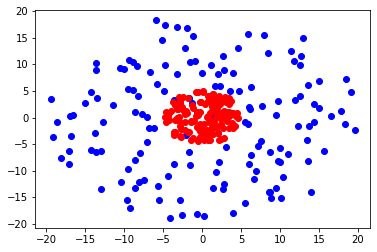

In [ ]:
plt.scatter(X[0:150,0],X[0:150,1], c = "b")
plt.scatter(X[150:300,0],X[150:300,1], c = "r")
plt.show()

In [ ]:
def entrenamiento(X,Y, red_neuronal, lr = 0.01):

  # Output guardara el resultado de cada capa
  # En la capa 1, el resultado es el valor de entrada
  output = [X]

  for num_capa in range(len(red_neuronal)):
    z = output[-1] @ red_neuronal[num_capa].W + red_neuronal[num_capa].b

    a = red_neuronal[num_capa].funcion_act[0](z)

    # Incluimos el resultado de la capa a output
    output.append(a)

  # Backpropagation

  back = list(range(len(output)-1))
  back.reverse()

  # Guardaremos el error de la capa en delta  
  delta = []

  for capa in back:
    # Backprop #delta

    a = output[capa+1]

    if capa == back[0]:
      x = mse(a,Y)[1] * red_neuronal[capa].funcion_act[1](a)
      delta.append(x)

    else:
      x = delta[-1] @ W_temp * red_neuronal[capa].funcion_act[1](a)
      delta.append(x)

    W_temp = red_neuronal[capa].W.transpose()

    # Gradient Descent #
    red_neuronal[capa].b = red_neuronal[capa].b - np.mean(delta[-1], axis = 0, keepdims = True) * lr
    red_neuronal[capa].W = red_neuronal[capa].W - output[capa].transpose() @ delta[-1] * lr

  return output[-1]

In [ ]:
class capa():
  def __init__(self, n_neuronas_capa_anterior, n_neuronas, funcion_act):
    self.funcion_act = funcion_act
    self.b  = np.round(stats.truncnorm.rvs(-1, 1, loc=0, scale=1, size= n_neuronas).reshape(1,n_neuronas),3)
    self.W  = np.round(stats.truncnorm.rvs(-1, 1, loc=0, scale=1, size= n_neuronas * n_neuronas_capa_anterior).reshape(n_neuronas_capa_anterior,n_neuronas),3)

neuronas = [2,4,8,1] 
funciones_activacion = [relu,relu, sigmoid]
red_neuronal = []

for paso in list(range(len(neuronas)-1)):
  x = capa(neuronas[paso],neuronas[paso+1],funciones_activacion[paso])
  red_neuronal.append(x)  

In [ ]:
error = []
predicciones = []

for epoch in range(0,1000):
  ronda = entrenamiento(X = X ,Y = Y ,red_neuronal = red_neuronal, lr = 0.001)
  predicciones.append(ronda)
  temp = mse(np.round(predicciones[-1]),Y)[0]
  error.append(temp)

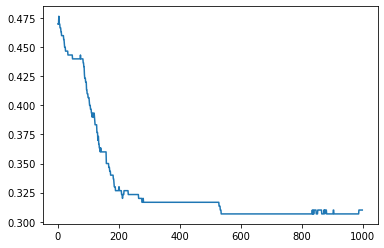

In [ ]:
epoch = list(range(0,1000))
plt.plot(epoch, error)